## Reto 1: Bootstrap

### 1. Objetivos:
    - Practicar la aplicación del algoritmo de boostrap
    - Practicar graficar los resultados del boostrap
 
---
    
### 2. Desarrollo:

En este Reto vamos a aplicar la técnica de bootstrap para explorar distribuciones muestrales de estadísticas. Para este Reto puedes elegir cualquiera de los datasets que vienen incluidos en este módulo. Ha llegado el momento de que te dejes guiar por tu curiosidad. Puedes ver una lista de todo lo que hay disponible [acá](../../Datasets/Readme.md).

Elige un dataset que tenga alguna variable numérica que te parezca interesante. Ahora, vamos a realizar algunos análisis sobre esa variable. Recuerda escribir tu análisis de manera ordenada, ya que si lo deseas habrá oportunidad de presentar tus hallazgos al grupo. Lleva a cabo los siguientes pasos:

1. Primero saca tus estimados de locación y dispersión.
2. Después, grafica tu variable usando un histograma y un boxplot, para que tengas una idea más detallada de su distribución.
3. Si consideras que hay valores atípicos, lidia con ellos de la manera que te parezca más adecuada.
3. Ahora vamos a ver qué tanta incertidumbre y sesgo hay en tus hallazgos. Vamos a aplicar la técnica de bootstrap 3 veces:

  a) Realiza 100 000 remuestreos, cada uno de 5 elementos. Obtén la medida estadística que te interese de cada muestra y guarda los resultados en una lista.
  
  b) Repite el mismo proceso, pero esta vez con remuestreos con longitud de 20% del total de los datos.
  
  c) Repite una vez más, pero esta vez cada nueva muestra tendrá una longitud de 90% de la original.
  
4. Grafica cada una de las listas resultantes en un histograma.
5. Obtén la asimetría y curtosis de cada una y compáralas entre ellas. ¿Cuál es más similar a una distribución normal? ¿Qué diferencias tienen entre ellas?
6. Comparte tus hallazgos con tus compañeros.

Sesgo dentro de los datos


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ProyectoBEDU/cve.csv', index_col=0)

df.head()

,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
id,,,,,,,,,,,,
CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['cvss'].sample(n=30, replace=False)

id
CVE-2009-3816        4.3
CVE-2011-0489        7.5
CVE-2019-0548        5.0
CVE-2015-2019        2.1
CVE-2018-17416       6.5
CVE-2013-6010        4.3
CVE-2019-1543        5.8
CVE-2017-1000215    10.0
CVE-2013-1627        7.8
CVE-2016-9129        5.0
CVE-2016-7798        5.0
CVE-2019-7096       10.0
CVE-2010-4813        3.5
CVE-2015-9249        7.5
CVE-2006-0855        5.1
CVE-2010-4298        7.5
CVE-2017-18603       4.3
CVE-2019-5807        6.8
CVE-2009-1821        5.0
CVE-2013-4107        4.3
CVE-2009-2690        5.0
CVE-2019-9951        7.5
CVE-2019-11927       6.8
CVE-2017-1100        3.5
CVE-2016-3874        9.3
CVE-2010-1879        9.3
CVE-2017-7208        5.8
CVE-2019-13470       7.5
CVE-2019-0027        3.5
CVE-2019-7957        5.0
Name: cvss, dtype: float64

In [ ]:
df['cvss'].sample(frac=0.1, replace=True)

id
CVE-2018-18767     1.9
CVE-2006-1749      7.5
CVE-2019-9241      5.0
CVE-2010-1451      5.0
CVE-2019-11587     4.3
                  ... 
CVE-2019-12257     5.8
CVE-2017-13707    10.0
CVE-2019-4280      5.0
CVE-2009-1136      9.3
CVE-2014-0912      5.0
Name: cvss, Length: 8966, dtype: float64

In [ ]:
calis = df['cvss']

means = []

for i in range(100_000):
    sample = calis.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

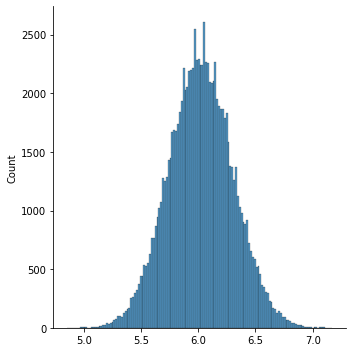

In [ ]:
sns.displot(serie_means);

In [ ]:
serie_means.skew()

0.0364381710801014

In [ ]:
serie_means.kurtosis()

-0.003651748489537976

***Error estandar e intervalos de confianza***

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 0.2816228414140163


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 4.8500000000000005
Valor máximo: 7.172000000000002
Rango: 2.322000000000002


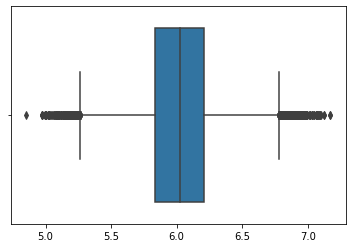

In [ ]:
sns.boxplot(x=serie_means);

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {calis.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 5.474000000000001 < 6.021428730758348 < 6.580000000000001


In [ ]:
mean_of_intervals = ((calis.mean() - limite_inferior) + (limite_superior - calis.mean())) / 2

print(f'Intervalo de 95% confianza de la media: {calis.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 6.021428730758348 +/- 0.5529999999999999


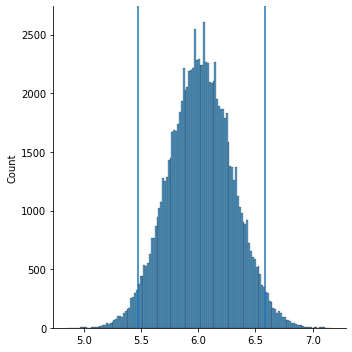

In [ ]:
sns.displot(serie_means, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

Entrenamiento y prueba

In [ ]:
df.isna().sum()

mod_date                    0
pub_date                    0
cvss                        0
cwe_code                    0
cwe_name                    0
summary                     0
access_authentication     884
access_complexity         884
access_vector             884
impact_availability       884
impact_confidentiality    884
impact_integrity          884
dtype: int64

In [ ]:
df = df.drop(columns=['access_authentication','access_complexity','access_vector','impact_availability','impact_confidentiality','impact_integrity'])

In [ ]:
X = df[['cwe_code']]
y = df['cvss']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(X_test, y_test)

-2.2606049329354505e-05

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_2.score(X, y)

7.879729586024453e-05

Tree Map


In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
df_grouped = df.groupby('cwe_name')[['cwe_code', 'summary']].max().reset_index()
df_grouped.head()

,cwe_name,cwe_code,summary
0,7PK - Code Quality,398,"NUUO CMS all versions 3.1 and prior, The appli..."
1,7PK - Errors,388,mailboxd in Zimbra Collaboration Suite 8.8 bef...
2,7PK - Security Features,254,xtrlock through 2.10 does not block multitouch...
3,7PK - Time and State,361,python-jose before 1.3.2 allows attackers to h...
4,Access of Resource Using Incompatible Type ('...,843,WordPress before 5.2.4 does not properly consi...


DATA SET COMPLEMENTARIO #1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_auth = pd.read_csv('/content/drive/MyDrive/ProyectoBEDU/auth.csv', index_col=0)

df_auth.head()

,IP address,route,Type
Monthday,,,
Nov30,ip-172-31-27-153,CRON[21882]:,pam_unix(cron:session): session closed for use...
Nov30,ip-172-31-27-153,CRON[22087]:,pam_unix(cron:session): session opened for use...
Nov30,ip-172-31-27-153,CRON[22087]:,pam_unix(cron:session): session closed for use...
Nov30,ip-172-31-27-153,sshd[22116]:,Connection closed by 122.225.103.87 [preauth]
Nov30,ip-172-31-27-153,sshd[22118]:,Connection closed by 122.225.103.87 [preauth]


In [ ]:
df_auth['route'].sample(n=50, replace=False)

Monthday
Dec6     sshd[18589]:
Dec2     sshd[24235]:
Dec6     sshd[27902]:
Dec3     sshd[28376]:
Dec2     sshd[32220]:
Dec19    sshd[31166]:
Dec2     sshd[16837]:
Dec2      sshd[6796]:
Dec2     sshd[15735]:
Dec23     sshd[8525]:
Dec26    sshd[21816]:
Dec2      sshd[6249]:
Dec2     sshd[20739]:
Dec9      sshd[2718]:
Dec2      sshd[6289]:
Dec12    sshd[14376]:
Dec12    sshd[11890]:
Dec23     sshd[7361]:
Dec6      sshd[8470]:
Dec2     sshd[30618]:
Dec19    sshd[30420]:
Dec2     sshd[22454]:
Dec26    sshd[18777]:
Dec2     sshd[17929]:
Dec1     sshd[24877]:
Dec24    sshd[13699]:
Dec23    sshd[11695]:
Dec31     sshd[7224]:
Dec23    sshd[10898]:
Dec25    sshd[17373]:
Dec6     sshd[23489]:
Dec14    sshd[20032]:
Dec2      sshd[5587]:
Dec6     sshd[22794]:
Dec2      sshd[8412]:
Dec2      sshd[6024]:
Nov30    sshd[22987]:
Dec6     sshd[10797]:
Dec2     sshd[21396]:
Dec23    sshd[11774]:
Dec10     sshd[4683]:
Dec2      sshd[7981]:
Dec29    sshd[903]: i
Dec6     sshd[20195]:
Dec30     sshd[5888]:
D

In [ ]:
df_auth['route'].sample(frac=0.1, replace=True)

Monthday
Dec6      sshd[8932]:
Dec2      sshd[8619]:
Dec19    sshd[31178]:
Dec2     sshd[11160]:
Dec6      sshd[6930]:
             ...     
Dec2      sshd[1012]:
Dec23    sshd[11053]:
Dec26    sshd[25188]:
Dec3     sshd[28629]:
Dec17    sshd[25834]:
Name: route, Length: 8684, dtype: object